In [1]:
import pandas as pd 
import numpy as np 
import os
import cv2
##import tensorflow as tf
import datetime
import re
import matplotlib.pyplot as plt

Import images

In [2]:
############## Train Images #######################
path='/home/dai/Documents/Data Science Certificate/Course 4/Group Assignment/chest_xray/train/PNEUMONIA'

pneunmonia_imgs=os.listdir(path)


path_normal='/home/dai/Documents/Data Science Certificate/Course 4/Group Assignment/chest_xray/train/NORMAL'

normal_imgs=os.listdir(path_normal)

############# Test Images #########################
path_val='/home/dai/Documents/Data Science Certificate/Course 4/Group Assignment/chest_xray/val/PNEUMONIA'

pneunmonia_imgs_val=os.listdir(path_val)


path_normal_val='/home/dai/Documents/Data Science Certificate/Course 4/Group Assignment/chest_xray/val/NORMAL'

normal_imgs_val=os.listdir(path_normal_val)

############# Val Images ##########################
path_test='/home/dai/Documents/Data Science Certificate/Course 4/Group Assignment/chest_xray/test/PNEUMONIA'

pneunmonia_imgs_test=os.listdir(path_test)


path_normal_test='/home/dai/Documents/Data Science Certificate/Course 4/Group Assignment/chest_xray/test/NORMAL'

normal_imgs_test=os.listdir(path_normal_test)

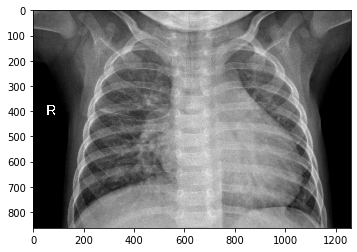

In [3]:
width = 150
height = 150

###### 1 = Gray, 0 = Color, -1 = unchanged #####
type_of_color = 1

test = cv2.imread(path + '/' +pneunmonia_imgs[3],type_of_color)
plt.imshow(test)
plt.show()

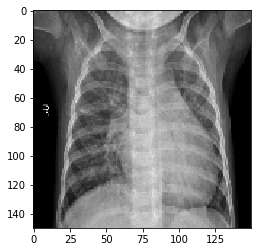

In [4]:
resize = cv2.resize(test, (width,height))
plt.imshow(resize)
plt.show()

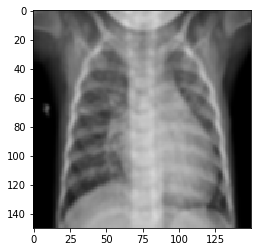

In [5]:
blur = cv2.GaussianBlur(resize, (5, 5), 0)
plt.imshow(blur)
plt.show()

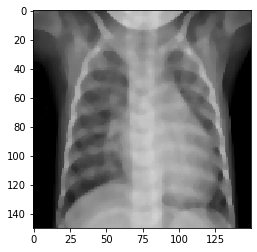

In [6]:
test_Mblur = cv2.medianBlur(resize, 5)
plt.imshow(test_Mblur)
plt.show()

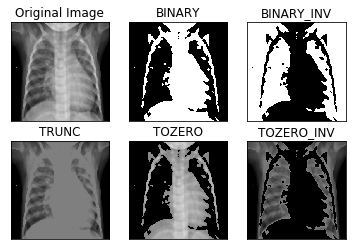

In [8]:

ret,thresh1 = cv2.threshold(test_Mblur,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(test_Mblur,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(test_Mblur,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(test_Mblur,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(test_Mblur,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [test_Mblur, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

Clean Images (resize and blur)

In [7]:
width = 150
height = 150
type_of_color = 1

In [8]:
################# Train Images ###################
normaldf = []
for i in range (len(normal_imgs)-1):
    if len(re.findall("jpeg",normal_imgs[i]))>0: 
        read_n_train = cv2.imread(path_normal + '/' +normal_imgs[i],type_of_color)
        resize_n_train = cv2.resize(read_n_train, (width,height))
        blur_n_train = cv2.medianBlur(resize_n_train, 5)
        normaldf.append(blur_n_train)
pneumoniadf = []
for i in range (len(pneunmonia_imgs)):
    if len(re.findall("jpeg",pneunmonia_imgs[i]))>0: 
        read_p_train = cv2.imread(path + '/' +pneunmonia_imgs[i],type_of_color)
        resize_p_train = cv2.resize(read_p_train, (width,height))
        blur_p_train = cv2.medianBlur(resize_p_train, 5)
        pneumoniadf.append(blur_p_train)

################# Test Images ###################

normaldf_test = []
for i in range (len(normal_imgs_test)):
    if len(re.findall("jpeg",normal_imgs_test[i]))>0:
        read_n_test = cv2.imread(path_normal_test + '/' +normal_imgs_test[i],type_of_color)
        resize_n_test = cv2.resize(read_n_test, (width,height))
        blur_n_test = cv2.medianBlur(resize_n_test, 5)
        normaldf_test.append(blur_n_test)
    
pneumoniadf_test = []
for i in range (len(pneunmonia_imgs_test)):
    if len(re.findall("jpeg",pneunmonia_imgs_test[i]))>0:
        read_p_test = cv2.imread(path_test + '/' +pneunmonia_imgs_test[i],type_of_color)
        resize_p_test = cv2.resize(read_p_test, (width,height))
        blur_p_test = cv2.medianBlur(resize_p_test, 5)
        pneumoniadf_test.append(blur_p_test)

################# Val Images ###################
normaldf_val = []
for i in range (len(normal_imgs_val)):
    if len(re.findall("jpeg",normal_imgs_val[i]))>0:
        read_n_val = cv2.imread(path_normal_val + '/' +normal_imgs_val[i],type_of_color)
        resize_n_val = cv2.resize(read_n_val, (width,height))
        blur_n_val = cv2.medianBlur(resize_n_val, 5)
        normaldf_val.append(blur_n_val)
    
pneumoniadf_val = []
for i in range (len(pneunmonia_imgs_val)):
    if len(re.findall("jpeg",pneunmonia_imgs_val[i]))>0:
        read_p_val = cv2.imread(path_val + '/' +pneunmonia_imgs_val[i],type_of_color)
        resize_p_val = cv2.resize(read_p_val, (width,height))
        blur_p_val = cv2.medianBlur(resize_p_val, 5)
        pneumoniadf_val.append(blur_p_val)

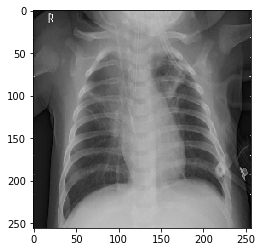

In [55]:
plt.imshow(pneumoniadf_test[16])
plt.show()

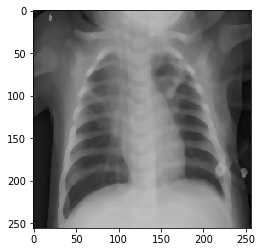

In [52]:
plt.imshow(pneumoniadf_test[16])
plt.show()

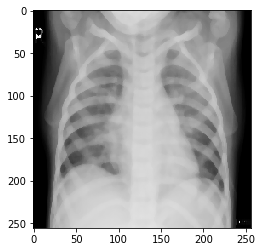

In [51]:
plt.imshow(normaldf_test[15])
plt.show()

In [9]:
################# Train Images ###################



normaldf = []
for i in range (len(normal_imgs)-1):
    if len(re.findall("jpeg",normal_imgs[i]))>0: 
        read_n_train = cv2.imread(path_normal + '/' +normal_imgs[i],type_of_color)
        resize_n_train = cv2.resize(read_n_train, (width,height))
        blur_n_train=cv2.cvtColor(resize_n_train, cv2.COLOR_BGR2GRAY)
        #blur_n_train=resize_n_train
#        blur_n_train = cv2.medianBlur(resize_n_train, 5)
        normaldf.append(blur_n_train)
pneumoniadf = []
for i in range (len(pneunmonia_imgs)):
    if len(re.findall("jpeg",pneunmonia_imgs[i]))>0: 
        read_p_train = cv2.imread(path + '/' +pneunmonia_imgs[i],type_of_color)
        resize_p_train = cv2.resize(read_p_train, (width,height))
        blur_p_train=cv2.cvtColor(resize_p_train, cv2.COLOR_BGR2GRAY)
#        blur_p_train = cv2.medianBlur(resize_p_train, 5)
        pneumoniadf.append(blur_p_train)

################# Test Images ###################

normaldf_test = []
for i in range (len(normal_imgs_test)):
    if len(re.findall("jpeg",normal_imgs_test[i]))>0:
        read_n_test = cv2.imread(path_normal_test + '/' +normal_imgs_test[i],type_of_color)
        resize_n_test = cv2.resize(read_n_test, (width,height))
        blur_n_test=cv2.cvtColor(resize_n_test, cv2.COLOR_BGR2GRAY)
#        blur_n_test = cv2.medianBlur(resize_n_test, 5)
        normaldf_test.append(blur_n_test)
    
pneumoniadf_test = []
for i in range (len(pneunmonia_imgs_test)):
    if len(re.findall("jpeg",pneunmonia_imgs_test[i]))>0:
        read_p_test = cv2.imread(path_test + '/' +pneunmonia_imgs_test[i],type_of_color)
        resize_p_test = cv2.resize(read_p_test, (width,height))
        blur_p_test=cv2.cvtColor(resize_p_test, cv2.COLOR_BGR2GRAY)
#        blur_p_test = cv2.medianBlur(resize_p_test, 5)
        pneumoniadf_test.append(blur_p_test)

################# Val Images ###################
normaldf_val = []
for i in range (len(normal_imgs_val)):
    if len(re.findall("jpeg",normal_imgs_val[i]))>0:
        read_n_val = cv2.imread(path_normal_val + '/' +normal_imgs_val[i],type_of_color)
        resize_n_val = cv2.resize(read_n_val, (width,height))
        blur_n_val=cv2.cvtColor(resize_n_val, cv2.COLOR_BGR2GRAY)
#        blur_n_val = cv2.medianBlur(resize_n_val, 5)
        normaldf_val.append(blur_n_val)
    
pneumoniadf_val = []
for i in range (len(pneunmonia_imgs_val)):
    if len(re.findall("jpeg",pneunmonia_imgs_val[i]))>0:
        read_p_val = cv2.imread(path_val + '/' +pneunmonia_imgs_val[i],type_of_color)
        resize_p_val = cv2.resize(read_p_val, (width,height))
        blur_p_val=cv2.cvtColor(resize_p_val, cv2.COLOR_BGR2GRAY)
#        blur_p_val = cv2.medianBlur(resize_p_val, 5)
        pneumoniadf_val.append(blur_p_val)


In [83]:
len(normaldf)

1340

In [70]:

dimension=width*height
print(dimension)
print(len(normaldf))
print(len(pneumoniadf))


65536
1340
3875


In [101]:
normaldf[1][1].shape

(256,)

In [91]:
normaldf[1].shape

(256, 256)

In [102]:
normaldf[1]

array([[41, 37, 41, ..., 57, 45, 48],
       [40, 41, 45, ..., 75, 52, 43],
       [40, 41, 40, ..., 86, 67, 62],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [107]:
pd.DataFrame(normaldf[1].reshape(256*256)).transpose().iloc[0,np.arange(256,256+256)]

256    40
257    41
258    45
259    40
260    43
       ..
507    77
508    72
509    75
510    52
511    43
Name: 0, Length: 256, dtype: uint8

In [100]:
pd.DataFrame(normaldf[2].reshape(256*256)).transpose()

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,140,139,153,197,205,190,179,179,175,169,...,14,14,12,13,14,11,12,12,14,14


In [76]:
normaldf[1][1].shape

(256, 3)

In [10]:
def compact_imagestodf(df,width,height):
    
    output=pd.DataFrame()
    for i in np.arange(0,len(df)):
        output=pd.concat([output,pd.DataFrame(df[i].reshape(width*height)).transpose()],axis=0)
    return(output)
    

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,49,53,55,55,54,67,109,126,144,145,...,0,0,0,0,0,0,0,0,0,0
0,41,37,41,39,43,44,36,35,28,33,...,0,0,0,0,0,0,0,0,0,0
0,140,139,153,197,205,190,179,179,175,169,...,14,14,12,13,14,11,12,12,14,14
0,42,42,53,64,70,75,81,75,80,83,...,0,0,0,0,0,0,0,0,0,0
0,68,75,79,86,90,89,94,96,136,154,...,0,0,0,0,10,234,254,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,41,45,48,54,54,59,62,67,66,68,...,18,18,17,22,19,17,19,20,19,21
0,60,71,61,62,64,63,60,66,66,66,...,0,0,0,0,0,0,0,0,0,0
0,96,93,95,97,93,94,96,141,146,130,...,0,0,0,1,0,4,6,11,7,6
0,0,0,0,0,12,24,31,40,50,56,...,0,0,0,0,0,0,0,0,0,0


In [11]:


normal_train=compact_imagestodf(normaldf,width,height)
pneumonia_train=compact_imagestodf(pneumoniadf,width,height)
normal_train['Target']='0'
pneumonia_train['Target']='1'


normal_train_val=compact_imagestodf(normaldf_val,width,height)
pneumonia_train_val=compact_imagestodf(pneumoniadf_val,width,height)
normal_train_val['Target']='0'
pneumonia_train_val['Target']='1'



normal_train_test=compact_imagestodf(normaldf_test,width,height)
pneumonia_train_test=compact_imagestodf(pneumoniadf_test,width,height)
normal_train_test['Target']='0'
pneumonia_train_test['Target']='1'


In [12]:
pd_train=pd.concat([normal_train,pneumonia_train],axis=0)

pd_val=pd.concat([normal_train_val,pneumonia_train_val],axis=0)
pd_test=pd.concat([normal_train_test,pneumonia_train_test],axis=0)

pd_train.reset_index(inplace=True)
pd_val.reset_index(inplace=True)
pd_test.reset_index(inplace=True)

In [14]:
pd_train

,index,0,1,2,3,4,5,6,7,8,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,Target
0,0,54,57,57,75,123,144,119,112,113,...,0,0,0,0,0,0,0,0,0,0
1,0,36,41,40,44,34,34,33,35,35,...,12,1,0,0,0,0,0,0,0,0
2,0,123,132,189,162,160,147,155,158,164,...,8,10,14,11,14,12,13,13,18,0
3,0,43,54,69,75,80,79,87,91,98,...,0,0,0,0,0,0,0,0,0,0
4,0,74,82,91,92,99,142,147,139,144,...,82,43,7,0,0,0,235,255,255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5210,0,202,201,199,201,201,204,194,161,128,...,21,20,21,27,38,57,86,144,185,1
5211,0,3,7,16,32,48,57,69,81,89,...,20,12,0,0,0,0,0,0,0,1
5212,0,46,49,49,50,86,110,103,93,96,...,25,23,24,20,22,22,24,26,23,1
5213,0,99,103,104,103,103,105,105,107,106,...,39,34,38,40,41,41,42,42,42,1


In [15]:
X_train=np.array(pd_train.iloc[:,np.arange(0,pd_train.shape[1]-1)])
X_val=np.array(pd_val.iloc[:,np.arange(0,pd_val.shape[1]-1)])
X_test=np.array(pd_test.iloc[:,np.arange(0,pd_test.shape[1]-1)])

Y_train=np.array(pd_train['Target'])
Y_val=np.array(pd_val['Target'])
Y_test=np.array(pd_test['Target'])

In [16]:
from sklearn.ensemble  import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


params_gboost={'learning_rate':[i for i in np.arange(0.01,0.08,0.01)],
             'n_estimators':[i for i in np.arange(5,105,10)]
             }
GBOOST=GradientBoostingClassifier()
GBOOSTCV=RandomizedSearchCV(GBOOST,param_distributions=params_gboost,scoring='accuracy',n_jobs=6,cv=5)

In [17]:
GBOOSTCV.fit(X_train,Y_train)
prd_gradientBoostcv=GBOOSTCV.predict(X_test)



In [23]:
from sklearn import metrics

print("Accuracy_GBoost",metrics.accuracy_score(np.ravel(Y_test),prd_gradientBoostcv))
print("ROC_AUC_GBoost",metrics.roc_auc_score(np.ravel(Y_test),prd_gradientBoostcv))
print("GINI_GBoost",(2*metrics.roc_auc_score(np.ravel(Y_test),prd_gradientBoostcv))-1)
print("Confusion_matrix_GBoost \n",metrics.confusion_matrix(np.ravel(Y_test),prd_gradientBoostcv))


Accuracy_GBoost 0.7067307692307693
ROC_AUC_GBoost 0.6115384615384615
GINI_GBoost 0.22307692307692295
Confusion_matrix_GBoost 
 [[ 54 180]
 [  3 387]]


In [26]:
GBOOSTCV.best_params_

{'n_estimators': 95, 'learning_rate': 0.05}

In [31]:
print("recall : ", (387/(387+3)))
print("precision : ", (387/(387+180)))

recall :  0.9923076923076923
precision :  0.6825396825396826


In [38]:
from sklearn.neighbors import KNeighborsClassifier


parameter_gr={'n_neighbors':[i for i in np.arange(5,45,10)]}



knn=KNeighborsClassifier()

knnCV=RandomizedSearchCV(knn,param_distributions=parameter_gr,scoring='accuracy',n_jobs=6,cv=5)




In [39]:
knnCV.fit(X_train,np.ravel(Y_train))
prd_knncv=knnCV.predict(X_test)

/home/dai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [40]:
from sklearn import metrics

print("Accuracy_KNN",metrics.accuracy_score(np.ravel(Y_test),prd_knncv))
print("ROC_AUC_KNN",metrics.roc_auc_score(np.ravel(Y_test),prd_knncv))
print("GINI_KNN",(2*metrics.roc_auc_score(np.ravel(Y_test),prd_knncv))-1)
print("Confusion_matrix_KNN \n",metrics.confusion_matrix(np.ravel(Y_test),prd_knncv))

Accuracy_KNN 0.7371794871794872
ROC_AUC_KNN 0.6504273504273504
GINI_KNN 0.3008547008547009
Confusion_matrix_KNN 
 [[ 71 163]
 [  1 389]]


In [41]:
print("recall : ", (389/(389+1)))
print("precision : ", (389/(389+163)))

recall :  0.9974358974358974
precision :  0.7047101449275363


In [42]:
knnCV.best_params_

{'n_neighbors': 5}

In [43]:
from sklearn.neighbors import KNeighborsClassifier


parameter_gr={'n_neighbors':[i for i in np.arange(2,10)]}



knn=KNeighborsClassifier()

knnCV2=RandomizedSearchCV(knn,param_distributions=parameter_gr,scoring='accuracy',n_jobs=6,cv=5)


In [44]:
knnCV2.fit(X_train,np.ravel(Y_train))
prd_knncv2=knnCV2.predict(X_test)

/home/dai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [47]:
from sklearn import metrics

print("Accuracy_KNN",metrics.accuracy_score(np.ravel(Y_test),prd_knncv2))
print("ROC_AUC_KNN",metrics.roc_auc_score(np.ravel(Y_test),prd_knncv2))
print("GINI_KNN",(2*metrics.roc_auc_score(np.ravel(Y_test),prd_knncv2))-1)
print("Confusion_matrix_KNN \n",metrics.confusion_matrix(np.ravel(Y_test),prd_knncv2))

Accuracy_KNN 0.7788461538461539
ROC_AUC_KNN 0.7085470085470086
GINI_KNN 0.41709401709401717
Confusion_matrix_KNN 
 [[100 134]
 [  4 386]]


In [48]:
print("recall : ", (386/(386+4)))
print("precision : ", (386/(386+134)))

recall :  0.9897435897435898
precision :  0.7423076923076923


### Saving models  

In [45]:
import pickle

pkl_filename = "gradient_boosting.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(GBOOSTCV, file)

In [46]:
pkl_filename = "KNN1.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(knnCV, file)

In [49]:
pkl_filename = "KNN2.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(knnCV2, file)